<a href="https://colab.research.google.com/github/dldowning/Fall2022-5222/blob/main/All_Features_Downing_Roberts_5222_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
%pip install emoji
import pandas as pd
import numpy as np
from statistics import mean
import nltk
from google.colab import files
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math
import requests
import string
import random
import seaborn as sns
from nltk.corpus import stopwords
import csv
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import re
import emoji
import plotly.graph_objects as go
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 4.9 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=50e7d39fe89825500741de3538f274167dff5f630e23967b2e58d1b417f7a5ee
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#Creating dataframe

In [ ]:
!gdown 1ubIaCqJnOzG-m_ns7VmdV87Ecs349BbG

Downloading...
From: https://drive.google.com/uc?id=1ubIaCqJnOzG-m_ns7VmdV87Ecs349BbG
To: /content/tweets_extracted.csv
100% 18.3M/18.3M [00:00<00:00, 154MB/s]


In [ ]:
URL = "https://drive.google.com/uc?export=download&id=1C8ARH_yok3uOvirD_oKvgEmAR22SuC9R"
response = requests.get(URL)
open("train_text_labels.csv", "wb").write(response.content)

5123208

In [ ]:
URL = "https://drive.google.com/uc?export=download&id=1z0URnDJ8ck38mQ4CvHi5TUkly8e46glP"
response = requests.get(URL)
open("test_text.txt", "wb").write(response.content)

1156877

In [ ]:
URL = "https://drive.google.com/uc?export=download&id=1xWQ2Lpf866Be4OR8J-cJHuY1S25dWppf"
response = requests.get(URL)
open("test_labels.txt", "wb").write(response.content)

36850

In [ ]:
df0 = pd.read_csv("/content/train_text_labels.csv", header=None)
df0.columns = ['Twitter', 'Label']
len(df0)

45615

In [ ]:
dft = pd.read_csv("/content/test_text.txt", sep="\n", header=None, quoting=csv.QUOTE_NONE)
dft.columns = ['Twitter']
len(dft)


12284

In [ ]:
dftl = pd.read_csv("/content/test_labels.txt", sep="\n", header=None)
dftl.columns = ['Label']
len(dftl)


12284

In [ ]:
dft['Label']=dftl['Label']
dft.head()

,Twitter,Label
0,@user @user what do these '1/2 naked pics' hav...,1
1,OH: “I had a blue penis while I was this” [pla...,1
2,"@user @user That's coming, but I think the vic...",1
3,I think I may be finally in with the in crowd ...,2
4,"@user Wow,first Hugo Chavez and now Fidel Cast...",0


In [ ]:
df0['Label'].value_counts()
#0	negative
#1	neutral
#2	positive

1    20673
2    17849
0     7093
Name: Label, dtype: int64

In [ ]:
#dropping the neutrals
df = df0[df0['Label'] != 1]
df.loc[df.Label == 2, 'Label'] = 1
df=df.reset_index(drop=True)
len(df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


24942

In [ ]:
dft = dft[dft['Label'] != 1]
dft=dft.reset_index(drop=True)
dft.loc[dft.Label == 2, 'Label'] = 1
len(df)
len(dft)

6347

In [ ]:
df_original_Tweets = df[['Twitter']].copy()
dft_original_Tweets = dft[['Twitter']].copy()

In [ ]:
def tweetcleanandtoke(dataframe,colname,newcolname):
  stop = stopwords.words('english')
  pattern_a = r'[^A-Za-z0-9]+' #non-alphanumeric
  pattern_b = r'\b\w{1,1}\b' #repeated words
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)

  for i in range(0, len(dataframe.index)):                       
    dataframe[colname].values[i] = dataframe[colname].values[i].lower()
    dataframe[colname].values[i] = dataframe[colname].values[i].replace('@user', '')
    dataframe[colname].values[i] = re.sub(emoji_pattern, '', dataframe[colname].values[i])
    dataframe[colname].values[i] = re.sub(pattern_a, ' ', dataframe[colname].values[i])
    dataframe[colname].values[i] = re.sub(pattern_b, '', dataframe[colname].values[i])
    

  dataframe[colname] = dataframe[colname].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

  rowname = dataframe[colname].name
  dataframe[newcolname]=0
  dataframe[newcolname] = dataframe.apply(lambda row: nltk.word_tokenize(row[rowname]), axis=1)

  return dataframe
  

In [ ]:
df=tweetcleanandtoke(df,'Twitter','Twitter_tokens')
dft=tweetcleanandtoke(dft,'Twitter','Twitter_tokens')

In [ ]:
df['Token_len']=df['Twitter_tokens'].apply(len)
dft['Token_len']=dft['Twitter_tokens'].apply(len)



In [ ]:
#Evaluating the tokens for some EDA, also verifying I have no length 0
list_of_lengths=[]
less_than_9_len=[]
for i in range (0, len(df)):
  try:
    list_of_lengths.append(len(df['Twitter_tokens'][i]));
  except:
    pass
  try:
    if len(df['Twitter_tokens'][i]) < 9:
      less_than_9_len.append(str(i));
  except:
    pass
print("These stats are for the training set")
print("The min length is: " + str(min(list_of_lengths)))
print("The max length is: " + str(max(list_of_lengths)))
print("The mean length is: " + str(mean(list_of_lengths)))
print("The number of tweets with less than 9 tokens is: " + str(len(less_than_9_len)))

These stats are for the training set
The min length is: 1
The max length is: 26
The mean length is: 11.502004650789832
The number of tweets with less than 9 tokens is: 4506


In [ ]:
list_of_lengths=[]
less_than_9_len=[]
for i in range (0, len(dft)):
  try:
    list_of_lengths.append(len(dft['Twitter_tokens'][i]));
  except:
    pass
  try:
    if len(dft['Twitter_tokens'][i]) < 9:
      less_than_9_len.append(str(i));
  except:
    pass
print("These stats are for the testing set")
print("The min test length is: " + str(min(list_of_lengths)))
print("The max test length is: " + str(max(list_of_lengths)))
print("The mean test length is: " + str(mean(list_of_lengths)))
print("The number of test tweets with less than 9 tokens is: " + str(len(less_than_9_len)))

These stats are for the testing set
The min test length is: 1
The max test length is: 20
The mean test length is: 9.237277453915235
The number of test tweets with less than 9 tokens is: 2587


#Loading and extracting TSVs

In [ ]:
!wget https://nlp.stanford.edu/projects/socialsent/files/socialsent_hist_freq.zip
!echo "N"| unzip /content/socialsent_hist_freq.zip

--2022-11-26 20:50:08--  https://nlp.stanford.edu/projects/socialsent/files/socialsent_hist_freq.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 521987 (510K) [application/zip]
Saving to: ‘socialsent_hist_freq.zip’

socialsent_hist_fre 100%[===================>] 509.75K   873KB/s    in 0.6s    

2022-11-26 20:50:09 (873 KB/s) - ‘socialsent_hist_freq.zip’ saved [521987/521987]

Archive:  /content/socialsent_hist_freq.zip
   creating: frequent_words/
  inflating: frequent_words/1850.tsv  
  inflating: frequent_words/1860.tsv  
  inflating: frequent_words/1870.tsv  
  inflating: frequent_words/1880.tsv  
  inflating: frequent_words/1890.tsv  
  inflating: frequent_words/1900.tsv  
  inflating: frequent_words/1910.tsv  
  inflating: frequent_words/1920.tsv  
  inflating: frequent_words/1930.tsv  
  inflating: frequent_words/1940.tsv  


In [ ]:
!wget https://nlp.stanford.edu/projects/socialsent/files/socialsent_hist_adj.zip
!echo "N"| unzip /content/socialsent_hist_adj.zip

--2022-11-26 20:50:09--  https://nlp.stanford.edu/projects/socialsent/files/socialsent_hist_adj.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201855 (197K) [application/zip]
Saving to: ‘socialsent_hist_adj.zip’

socialsent_hist_adj 100%[===================>] 197.12K   677KB/s    in 0.3s    

2022-11-26 20:50:09 (677 KB/s) - ‘socialsent_hist_adj.zip’ saved [201855/201855]

Archive:  /content/socialsent_hist_adj.zip
   creating: adjectives/
  inflating: adjectives/1850.tsv     
  inflating: adjectives/1860.tsv     
  inflating: adjectives/1870.tsv     
  inflating: adjectives/1880.tsv     
  inflating: adjectives/1890.tsv     
  inflating: adjectives/1900.tsv     
  inflating: adjectives/1910.tsv     
  inflating: adjectives/1920.tsv     
  inflating: adjectives/1930.tsv     
  inflating: adjectives/1940.tsv     
  inflating: adjec

In [ ]:
df_2000adj = pd.read_csv("/content/adjectives/2000.tsv", sep="\t", header=None)
df_2000adj.columns = ['Word', 'Sentiment', 'Std']
df_2000freq = pd.read_csv("/content/frequent_words/2000.tsv", sep="\t", header=None)
df_2000freq.columns = ['Word', 'Sentiment', 'Std']

In [ ]:
!wget https://nlp.stanford.edu/projects/socialsent/files/socialsent_subreddits.zip
!echo "N"| unzip /content/socialsent_subreddits.zip

--2022-11-26 20:50:10--  https://nlp.stanford.edu/projects/socialsent/files/socialsent_subreddits.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15659374 (15M) [application/zip]
Saving to: ‘socialsent_subreddits.zip’

socialsent_subreddi 100%[===================>]  14.93M  6.76MB/s    in 2.2s    

2022-11-26 20:50:12 (6.76 MB/s) - ‘socialsent_subreddits.zip’ saved [15659374/15659374]

Archive:  /content/socialsent_subreddits.zip
   creating: subreddits/
  inflating: subreddits/.zip         
  inflating: subreddits/2007scape.tsv  
  inflating: subreddits/3DS.tsv      
  inflating: subreddits/4chan.tsv    
  inflating: subreddits/ACTrade.tsv  
  inflating: subreddits/AdviceAnimals.tsv  
  inflating: subreddits/amiugly.tsv  
  inflating: subreddits/Anarcho_Capitalism.tsv  
  inflating: subreddits/Android.tsv  
  inflating: subreddits

In [ ]:
list_files = ['3DS.tsv', 
'4chan.tsv',
'2007scape.tsv',
'ACTrade.tsv',
'amiugly.tsv',
'BabyBumps.tsv',
'baseball.tsv',
'canada.tsv',
'CasualConversation.tsv',
'DarkNetMarkets.tsv',
'darksouls.tsv',
'elderscrollsonline.tsv',
'Eve.tsv',
'Fallout.tsv',
'fantasyfootball.tsv',
'GameDeals.tsv',
'gamegrumps.tsv',
'halo.tsv',
'Homebrewing.tsv',
'IAmA.tsv',
'india.tsv',
'jailbreak.tsv',
'Jokes.tsv',
'KerbalSpaceProgram.tsv',
'keto.tsv',
'leagueoflegends.tsv',
'Libertarian.tsv',
'magicTCG.tsv',
'MakeupAddiction.tsv',
'Naruto.tsv',
'nba.tsv',
'oculus.tsv',
'OkCupid.tsv',
'Parenting.tsv',
'pathofexile.tsv',
'raisedbynarcissists.tsv',
'Random_Acts_Of_Amazon.tsv',
'science.tsv',
'Seattle.tsv',
'TalesFromRetail.tsv',
'talesfromtechsupport.tsv',
'ultrahardcore.tsv',
'videos.tsv',
'Warthunder.tsv',
'whowouldwin.tsv',
'xboxone.tsv',
'yugioh.tsv',
]

In [ ]:
list_dicts=[]
for i in range(0,len(list_files)):
    dfname='df_'+str(list_files[i])
    dfname=dfname.replace('.tsv','')
    path="/content/subreddits/" + list_files[i]
    dataframe = pd.read_csv(path, sep="\t", header=None)
    dataframe.columns = ['Word', 'Sentiment', 'Std']
    dataframe=dataframe.drop(columns=['Std'])
    list_dicts.append(dict(dataframe.values))

In [ ]:
#combine dictionaries
def dict_merger(dict1, dict2):
    new_dict = {**dict1, **dict2}
    return new_dict

In [ ]:
df_2000adj=df_2000adj.drop(columns='Std')
feature1=dict(df_2000adj.values)
df_2000freq=df_2000freq.drop(columns='Std')
feature2=dict(df_2000freq.values)

In [ ]:
feature3 = {}
for i in range(0, 8):
  feature3=dict_merger(feature3,list_dicts[i])

feature4 = {}
for i in range(8, 16):
  feature4=dict_merger(feature4,list_dicts[i])

feature5 = {}
for i in range(16, 23):
  feature5=dict_merger(feature5,list_dicts[i])

feature6 = {}
for i in range(23, 29):
  feature6=dict_merger(feature6,list_dicts[i])

feature7 = {}
for i in range(29, 34):
  feature7=dict_merger(feature7,list_dicts[i])

feature8 = {}
for i in range(34, 41):
  feature8=dict_merger(feature8,list_dicts[i])

feature9 = {}
for i in range(41, 47):
  feature9=dict_merger(feature9,list_dicts[i])





#Extracting features

In [ ]:
#one thing that boosted my scores was instead of taking one word per feature, I summed 9 words per feature
#I took words at random and oversampled shorter tweets. boosted the F1 score by letting randomization try to hit a good token
def lookups(row):
  lookup_index=row.name
  #print("This is the lookup_index: " + str(lookup_index))
  range_len=(df['Token_len'][lookup_index])
  #print("This is the range_len: " + str(range_len))
  score=[]
  for i in range(0, 9):
    #print("Starting the for loop at: " + str(i))
    token=random.randint(0, range_len) 
    token -= 1
    #print("The token is: " + str(token))
    word_tok=df.iloc[lookup_index, 2][token]
    #print("The word_tok is: " + str(word_tok))
    try:
      score.append(current_dict[word_tok])
    except:
      pass
  try:
      sum_score=sum(score)
  except:
      sum_score=0
  return sum_score

def lookupst(row):
  lookup_index=row.name
  #print("This is the lookup_index: " + str(lookup_index))
  range_len=(dft['Token_len'][lookup_index])
  #print("This is the range_len: " + str(range_len))
  score=[]
  for i in range(0, 9):
    #print("Starting the for loop at: " + str(i))
    token=random.randint(0, range_len) 
    token -= 1
    #print("The token is: " + str(token))
    word_tok=dft.iloc[lookup_index, 2][token]
    #print("The word_tok is: " + str(word_tok))
    try:
      score.append(current_dict[word_tok])
    except:
      pass
  try:
      sum_score=sum(score)
  except:
      sum_score=0
  return sum_score

def wordlengther(row):
    index=row.name
    token_list=df['Twitter_tokens'][index]
    longest_word=1
    for word in token_list:
        if longest_word<len(word):
          longest_word=len(word)
    log_long=np.log10(longest_word)
    return log_long

def wordfiver(row):
    index=row.name
    token_list=df['Twitter_tokens'][index]
    five_counts=1
    for word in token_list:
        if len(word)>=5:
          five_counts+=1
    log_five=np.log10(five_counts)
    return log_five

def wordlengthert(row):
    index=row.name
    token_list=dft['Twitter_tokens'][index]
    longest_word=1
    for word in token_list:
        if longest_word<len(word):
          longest_word=len(word)
    log_long=np.log10(longest_word)
    return log_long

def wordfivert(row):
    index=row.name
    token_list=dft['Twitter_tokens'][index]
    five_counts=1
    for word in token_list:
        if len(word)>=5:
          five_counts+=1
    log_five=np.log10(five_counts)
    return log_five

def mostpos(row):  #need the negative version too, mostneg
    index=row.name
    token_list=df['Twitter_tokens'][index]
    max_value=0
    for word in token_list:
      try: pos_value=feature3[word]   #replace with super dictionary
      except: pos_value=0
      if max_value<pos_value:
        max_value=pos_value
    return max_value

In [ ]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [ ]:
df['feature24']=0
df['feature24']=df.apply(mostpos,axis=1)

In [ ]:
df['feature1']=0
df['feature2']=0
df['feature3']=0
df['feature4']=0
df['feature5']=0
df['feature6']=0
df['feature7']=0
df['feature8']=0
df['feature9']=0
df['feature10']=0
df['feature11']=0
df['feature12']=0


In [ ]:
features_list=['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9']
for i in range(0, len(features_list)):
  current_dict=list_dicts[i]
  df[features_list[i]]=df.apply(lookups, axis=1)
  dft[features_list[i]]=dft.apply(lookupst, axis=1)

KeyboardInterrupt: ignored

In [ ]:
df['feature10']=df['Token_len'].apply(np.log10)
dft['feature10']=dft['Token_len'].apply(np.log10)
df['feature11']=df.apply(wordlengther, axis=1)
df['feature12']=df.apply(wordfiver, axis=1)
dft['feature11']=dft.apply(wordlengthert, axis=1)
dft['feature12']=dft.apply(wordfivert, axis=1)

In [ ]:
df['feature11']=df.apply(wordlengther, axis=1)
df['feature12']=df.apply(wordfiver, axis=1)
dft['feature11']=dft.apply(wordlengthert, axis=1)
dft['feature12']=dft.apply(wordfivert, axis=1)

In [ ]:
df

In [ ]:
dft

In [ ]:
df_original_Tweets.columns = ['Original Tweet']
df['Original Tweet'] = df_original_Tweets['Original Tweet']

first_column = df.pop('Original Tweet')
# insert column using insert(position,column_name,first_column) function
df.insert(0, 'Original Tweet', first_column)

In [ ]:
dft_original_Tweets.columns = ['Original Tweet']
dft['Original Tweet'] = dft_original_Tweets['Original Tweet']

first_column = dft.pop('Original Tweet')
# insert column using insert(position,column_name,first_column) function
dft.insert(0, 'Original Tweet', first_column)

In [ ]:
df

In [ ]:
dft

In [ ]:
def feature_extraction13_23(dataframe):  #pass in df or dft 

  dataframe["Feature 13"] = np.nan # Count: Words in + Lexicon
  dataframe["Feature 14"] = np.nan # Count: Words in - Lexicon
  dataframe["Feature 15"] = np.nan # Count: Nouns in Tweet
  dataframe["Feature 16"] = np.nan # Count: Adjectives
  dataframe["Feature 17"] = np.nan # Ratio: Unique words - total words
  dataframe["Feature 18"] = np.nan # Ratio: Stop Words - Total Words
  dataframe["Feature 19"] = np.nan # Ratio Nouns to total words
  dataframe["Feature 20"] = np.nan # Ratio of proper nouns to total words
  dataframe["Feature 21"] = np.nan # Ratio Capital letters to lowercase letters
  dataframe["Feature 22"] = np.nan # Ratio of punctuation characters to Total Characters
  dataframe["Feature 23"] = np.nan # Does Tweet conatin the word 'No'
  dataframe["Feature 24"] = np.nan # Mean Length of all words in tweet 
  dataframe["Feature 25"] = np.nan # Log of Mean Length of all words in tweet 
  dataframe["Feature 26"] = np.nan # Highest word score of all words in tweet 
  dataframe["Feature 27"] = np.nan # Lowest word score of all words in tweet
  dataframe["Feature 28"] = np.nan # Emoji count  



  #CREATE POSITIVE AND NEGATIVE LEXICONS
  pos_lexicon = []
  neg_lexicon = []

  for i in range(0, len(list_dicts)):               
    for j in range(0, len(list_dicts[i])):    

      if list(list_dicts[i].values())[j] >= 0:         
        pos_lexicon.append(list(list_dicts[i].keys())[j])        
          
      if list(list_dicts[i].values())[j] < 0:         
        neg_lexicon.append(list(list_dicts[i].keys())[j]) 

  pos_lexicon = [*set(pos_lexicon)]   # Remove duplicate values from + lexicon
  neg_lexicon = [*set(neg_lexicon)]   # Remove duplicate values from - lexicon

  wrds_in_PosNeg = intersection(pos_lexicon, neg_lexicon)
  wrds_in_PosNeg.pop(0)


  #Look for duplicates across dictionaries 
  duplicate_dict = {}

  for i in range(0, len(wrds_in_PosNeg)):
    sent_scores_2sum = []

    for j in range(0, len(list_dicts)):
      subreddit_wrd_list = list(list_dicts[j].keys())

      if wrds_in_PosNeg[i] in subreddit_wrd_list:
        sent_scores_2sum.append(list_dicts[j].get(wrds_in_PosNeg[i]))
        num_avg = mean(sent_scores_2sum)
    
    duplicate_dict[wrds_in_PosNeg[i]] =  num_avg

  # Remove words that now have a clear positive or negative classification
  for w in duplicate_dict.items():        # .items() returns a tuple of (word, score). See Cell above for all words: scores in dict
    if w[1] >= 0:                         # if w[1] (the score) is greater than 0...
      neg_lexicon.remove(w[0])            # remove it from the negative lexicon
    if w[1] < 0:                          # If w[1] (the score) is less than 0...
      pos_lexicon.remove(w[0])            # remove the word from the positive lexicon


  # COUNT POSITIVE AND NEGATIVE WORDS (13 & 14)
  neg_lex_set = set(neg_lexicon)
  pos_lex_set = set(pos_lexicon)

  for i in range(0, len(dataframe.index)):
    x = set(dataframe['Twitter_tokens'][i])
    dataframe['Feature 13'].values[i] = len(x.intersection(pos_lex_set))
    dataframe['Feature 14'].values[i] = len(x.intersection(neg_lex_set))


  # COUNT NOUNS IN TWEET (15)
  for i in range(0, len(dataframe.index)):
    tokens = dataframe['Twitter_tokens'][i]
    tokens = [w for w in tokens if not w in stop_words]
    tagged = nltk.pos_tag(tokens)

    noun_definitions = ['NN', 'NNS', 'NNP', 'NNPS']
    count = 0

    for j in range(0, len(tagged)):
      if tagged[j][1] in noun_definitions:
        count += 1
    
    dataframe['Feature 15'].values[i] = count  


  #COUNT ADJECTIVES IN TWEET (16)
  for i in range(0, len(dataframe.index)):
    tokens = dataframe['Twitter_tokens'][i]
    tokens = [w for w in tokens if not w in stop_words]
    tagged = nltk.pos_tag(tokens)

    adj_definitions = ['JJ', 'JJR', 'JJS ']
    count = 0

    for j in range(0, len(tagged)):
      if tagged[j][1] in adj_definitions:
        count += 1
    
    dataframe['Feature 16'].values[i] = count

  # RATIO: UNIQUE TO TOTAL WORDS (17)
  for i in range(0, len(dataframe.index)):                       
    tokens = dataframe['Twitter_tokens'][i]
    x = np.array(tokens)
    ratio = len(np.unique(x)) / len(tokens)
    dataframe['Feature 17'].values[i] = ratio


  # STOP WORDS TO TOTAL WORDS (18)
  for i in range(0, len(dataframe.index)):                       
    tokens = dataframe['Twitter_tokens'][i]
    x = np.array(tokens)
    stop_wrds_count = [w for w in tokens if w in stop_words]
    ratio = len(stop_wrds_count) / len(tokens)
    dataframe['Feature 18'].values[i] = ratio


  # RATIO OF NOUNS TO TOTAL WORDS (19)

  for i in range(0, len(dataframe.index)):
      tokens = dataframe['Twitter_tokens'][i]
      tokens = [w for w in tokens if not w in stop_words]
      tagged = nltk.pos_tag(tokens)

      noun_definitions = ['NN', 'NNS', 'NNP', 'NNPS']
      count = 0

      for j in range(0, len(tagged)):
        if tagged[j][1] in noun_definitions:
          count += 1

      ratio = count / len(dataframe['Twitter_tokens'][i])
      dataframe['Feature 19'].values[i] = ratio

     
  # RATIO OF PROPER NOUNS TO TOTAL WORDS (20)

  for i in range(0, len(dataframe.index)):
      tokens = dataframe['Twitter_tokens'][i]
      tokens = [w for w in tokens if not w in stop_words]
      tagged = nltk.pos_tag(tokens)

      noun_definitions = ['NNP', 'NNPS']
      count = 0

      for j in range(0, len(tagged)):
        if tagged[j][1] in noun_definitions:
          count += 1

      ratio = count / len(dataframe['Twitter_tokens'][i])
      dataframe['Feature 20'].values[i] = ratio

  # RATIO OF CAPITAL LETTERS TO LOWERCASE LETERS(21)
  for i in range(0, len(dataframe.index)):
    upper_count = len(re.findall(r'[A-Z]', dataframe['Original Tweet'].values[i]))
    lower_count = len(re.findall(r'[a-z]', dataframe['Original Tweet'].values[i]))

    if lower_count == 0:
      dataframe['Feature 21'].values[i] = 0 
    if lower_count!= 0: 
      ratio = upper_count / lower_count
      dataframe['Feature 21'].values[i] = ratio


  # RATIO PUNCTUATION CHARACTERS TO TOTAL CHARACTERS (22)
  for i in range(0, len(dataframe.index)):
    count = 0

    for j in dataframe['Original Tweet'][i]:
      if j in string.punctuation:
        count += 1

    ratio = count / len(dataframe['Original Tweet'][i])
    dataframe['Feature 22'].values[i] = ratio


  # DOES TWEET CONTAIN NO (23)
  for i in range(0, len(dataframe.index)):                       # In the range 0 to length of the tweets dataframe         # Tokenize and lowercase tweets 
    if 'no' in dataframe['Twitter_tokens'][i]:                                    # If no is in tweet dataframe value is 1 if not value is zero
      dataframe['Feature 23'].values[i] = 1
    else: 
      dataframe['Feature 23'].values[i] = 0

  # MEAN LENGTH OF WORDS IN TWEET (24)
  for i in range(0, len(dataframe.index)):
    average = sum(len(token) for token in dataframe['Twitter_tokens'][i]) / len(dataframe['Twitter_tokens'][i])

    dataframe['Feature 24'].values[i] = average



  # LOG MEAN LENGTH OF WORDS IN TWEET (25)
  for i in range(0, len(dataframe.index)):
    average = sum(len(token) for token in dataframe['Twitter_tokens'][i]) / len(dataframe['Twitter_tokens'][i])

    dataframe['Feature 25'].values[i] = math.log(average)


  # HIGHEST SCORE VALUE OF TOKENS (26)
  dataframe['Feature 26'] = dataframe['Feature 26'].astype('object')

  for i in range(0, len(dataframe.index)):
    found_values = []

    for j in range(0 , len(dataframe['Twitter_tokens'][i])):
      if dataframe['Twitter_tokens'][i][j] in super_dict:
        found_values.append(super_dict.get(dataframe['Twitter_tokens'][i][j])) 

      if not found_values:
        found_values.append(0) 

    dataframe['Feature 26'].values[i] = max(found_values)


  # LOWEST SCORE VALUE OF TOKENS (27)
  dataframe['Feature 27'] = dataframe['Feature 27'].astype('object')

  for i in range(0, len(dataframe.index)):
    found_values = []

    for j in range(0 , len(dataframe['Twitter_tokens'][i])):
      if dataframe['Twitter_tokens'][i][j] in super_dict:
        found_values.append(super_dict.get(dataframe['Twitter_tokens'][i][j])) 

      if not found_values:
        found_values.append(0) 

    dataframe['Feature 27'].values[i] = min(found_values)


  # COUNT EMOJIS (28)
  for i in range(0, len(dataframe.index)):
    count = len(re.findall(r'[\U0001f600-\U0001f650]', dataframe['Original Tweet'][i]))

    dataframe['Feature 28'].values[i] = count

  return(dataframe)

In [ ]:
# Combination of all subreddit dict values into one dict 
super_dict = {}
for i in range(0, len(list_dicts)):
  super_dict=dict_merger(super_dict,list_dicts[i])

In [ ]:
df_updated = feature_extraction13_23(df)
dft_updated = feature_extraction13_23(dft)

In [ ]:
df = df_updated
dft = dft_updated

In [ ]:

#dfc=pd.concat([df, dft])
dfc.to_csv('tweets_extracted.csv')

#Forward Selection of Features

In [ ]:
#!gdown 1ubIaCqJnOzG-m_ns7VmdV87Ecs349BbG
#dfc=pd.read_csv('tweets_extracted.csv')
#Xc=dfc.drop(columns=['Unnamed: 0', 'Twitter','Label','Twitter_tokens','Token_len','Original Tweet','feature24']) #whats wrong with feature24?
#yc=dfc['Label']

Downloading...
From: https://drive.google.com/uc?id=1ubIaCqJnOzG-m_ns7VmdV87Ecs349BbG
To: /content/tweets_extracted.csv
100% 18.3M/18.3M [00:00<00:00, 132MB/s] 


In [ ]:
dfc=pd.concat([df, dft])
Xc=dfc.drop(columns=['Twitter','Label','Twitter_tokens','Token_len','Original Tweet','feature24']) #whats wrong with feature24?
yc=dfc['Label']

In [ ]:
def best_feature_maker(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, shuffle=True, random_state=42)
  sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
  sel.fit(X_train, y_train)
  print("The best features to use are: ")
  feature_index = sel.get_support(indices=True)
  x_new=x.iloc[:,feature_index]
  print(x_new.head())
  weights=sel.estimator_.feature_importances_
  weights_percent = 100 * (weights/max(weights))
  for i in range(0,len(weights)):
    print("The feature " + str(X_train.columns[i]) + " has a relative importance percentage " + str(weights_percent[i]))
  return x_new

  #https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
  #call coefficients for a third ranking

In [ ]:
Xc_selected=best_feature_maker(Xc,yc)

The best features to use are: 
   feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0      1.42     -0.23     -0.43     -0.52      0.56     -0.31      2.26   
1      5.64      2.17     -0.54      0.54      0.51      1.24      0.57   
2      1.82     -2.73     -1.70     -0.09     -0.71      3.65      2.08   
3      0.25      0.14      3.65      1.32     -2.67     -5.03      4.65   
4      3.48      0.32     -3.09     -1.57     -1.32      2.60      0.46   

   feature8  feature9  Feature 13  Feature 14  Feature 21  Feature 22  \
0      0.81      0.83         7.0         1.0    0.130952    0.033898   
1      5.02      1.29         8.0         3.0    0.066667    0.034783   
2     -0.08      0.11         5.0         4.0    0.238095    0.068627   
3      1.78      1.38        14.0         5.0    1.611111    0.121429   
4      0.74      4.52         3.0         5.0    0.033898    0.012658   

   Feature 26  Feature 27  
0        1.57       -0.44  
1        1.52       -0.

#LogReg

In [ ]:
class LogRegression:
    def __init__(self, feature_number, lr, epochs):      
        self.intercept = 0
        self.weight = np.zeros(feature_number)
        self.lr = lr
        self.epochs = epochs


    def sigmoid(self, X):
        z = np.dot(X, self.weight) + self.intercept
        return 1 / (1 + np.exp(-z))
    
    def loss(self, s, y):
        return (-y * np.log(s) - (1 - y) * np.log(1 - s)).mean()
    
    def gradient_descent(self, X, s, y):
        return np.dot(X.T, (s - y)) / y.shape[0]
    
    def gradient_descent_intercept(self, s, y):
        return np.mean(s - y)

    def fit(self, X, y):
        losses = []
        for i in range(self.epochs):
            sigma = self.sigmoid(X)

            dW = self.gradient_descent(X , sigma, y)
            dintercept = self.gradient_descent_intercept(sigma, y)

            self.weight -= self.lr * dW
            self.intercept -= self.lr * dintercept

            loss = self.loss(sigma, y)
            if len(losses) % 1000 == 0:
                print("The iteration is " + str(i) + " and the loss is " +  str(loss))
            losses.append(loss)
            if i > 1000:
              if losses[-1] > losses[-100] - .0001:     #the difference should be an argument
                print("The weight is ")
                print(self.weight)
                print("The intercept is ")
                print(self.intercept)
                break
        return losses
    
    def predict(self, train):
        x_new = train
        result = self.sigmoid(x_new)
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] >= 0.5: 
                y_pred[i] = 1
            else:
                y_pred[i] = 0
                continue
                
        return y_pred
      
    def metrics(self, pred, test):
        y_pred=pred
        y_test=test
        tp=(sum((y_pred == 1) & (y_test==1)))
        fp=(sum((y_pred == 1) & (y_test==0)))
        fn=(sum((y_pred == 0) & (y_test==1)))
        tn=(sum((y_pred == 0) & (y_test==0)))
        confusion_matrix=[[tn, fp], [fn, tp]]
        print("The confusion matrix is: ")
        print(confusion_matrix[0])
        print(confusion_matrix[1])
        print('The accuracy for the Twitter sentiment is {}'.format(sum(y_pred == y_test) / y_test.shape[0]))
        print('The precision for the Twitter sentiment is {}'.format((tp/(tp+fp))))
        print('The recall for the Twitter sentiment is {}'.format((tp/(tp+fn))))
        print('The F1 score for the Twitter sentiment is {}'.format((2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fn))+(tp/(tp+fp))))))
        return confusion_matrix

In [ ]:
df.head()

,Twitter,Label,Twitter_tokens,Token_len,feature24,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,qt original draft 7th book remus lupin survive...,1,"[qt, original, draft, 7th, book, remus, lupin,...",11,1.39,3.28,4.10,-0.72,0.44,0,0,0,0,0,0,0,0
1,alciato bee invest 150 million january another...,1,"[alciato, bee, invest, 150, million, january, ...",13,3.63,1.33,-0.26,0.68,0.17,0,0,0,0,0,0,0,0
2,lit mum kerry louboutins wonder many willam ow...,1,"[lit, mum, kerry, louboutins, wonder, many, wi...",12,0.73,0.73,-0.68,-1.67,0.27,0,0,0,0,0,0,0,0
3,soul train oct 27 halloween special ft dot fin...,1,"[soul, train, oct, 27, halloween, special, ft,...",21,2.50,-1.38,0.10,2.67,2.80,0,0,0,0,0,0,0,0
4,disappointed wwe summerslam want see john cena...,0,"[disappointed, wwe, summerslam, want, see, joh...",10,1.75,0.02,5.23,-5.12,-2.49,0,0,0,0,0,0,0,0


In [ ]:
dft.head()

,Twitter,Label,Twitter_tokens,Token_len,feature1,feature2,feature3,feature4
0,think may finally crowd mannequinchallenge gra...,1,"[think, may, finally, crowd, mannequinchalleng...",6,2.17,6.82,3.96,4.46
1,wow first hugo chavez fidel castro danny glove...,0,"[wow, first, hugo, chavez, fidel, castro, dann...",16,0.22,-0.48,0.94,1.78
2,twitter thankyouobama shows heartfelt gratitud...,1,"[twitter, thankyouobama, shows, heartfelt, gra...",6,0.24,2.78,-0.68,-0.87
3,take away illegals dead people trump wins popu...,0,"[take, away, illegals, dead, people, trump, wi...",9,-0.39,-3.03,-3.25,1.40
4,onedirection harrystyles cute little dance,1,"[onedirection, harrystyles, cute, little, dance]",5,0.18,1.03,6.25,1.20


In [ ]:
#experimented with different splits, best performance was to concatenate the train and test sets
#and then randomly resample them to create new train and test sets
#this gave better variance and improved the score
"""
X_train=df.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])
X_test=dft.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])
y_train=df['Label']
y_test=dft['Label']
X=X_train
y=y_train
"""

"\nX_train=df.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])\nX_test=dft.drop(columns=['Twitter','Label','Twitter_tokens','Token_len'])\ny_train=df['Label']\ny_test=dft['Label']\nX=X_train\ny=y_train\n"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
Xc_selected, yc, test_size=0.2, random_state=42)
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
#very minor boost in performance since our features are already of similar scale, but did give a boost

In [ ]:
feature_number, lr, epochs = X_train.shape[1], .5, 1000000

LogRegSent = LogRegression(feature_number, lr, epochs)

losses = LogRegSent.fit(X_train_norm, y_train)

The iteration is 0 and the loss is 0.6931471805599453
The iteration is 1000 and the loss is 0.5200311243215193
The iteration is 2000 and the loss is 0.5147366437535069
The iteration is 3000 and the loss is 0.5118344063779497
The iteration is 4000 and the loss is 0.5097822238029467
The iteration is 5000 and the loss is 0.5082863512480211
The weight is 
[ 3.82739655  0.79955854 -0.07744657  1.41160887 -0.9209953   0.81062744
 -0.20679894  2.05837136  1.89220124  3.03677959 -4.67162514 -0.09132563
  0.44075742  1.26288049  1.17038968]
The intercept is 
-6.032237746989782


<function matplotlib.pyplot.show(*args, **kw)>

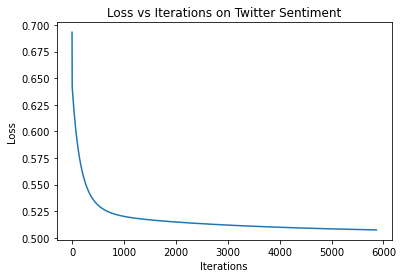

In [ ]:
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations on Twitter Sentiment")
plt.plot(losses)
plt.show


In [ ]:
y_pred = LogRegSent.predict(X_test_norm)

In [ ]:
cm = LogRegSent.metrics(y_pred, y_test)

The confusion matrix is: 
[1149, 1036]
[519, 3554]
The accuracy for the Twitter sentiment is 0.7515180568871844
The precision for the Twitter sentiment is 0.7742919389978213
The recall for the Twitter sentiment is 0.8725754971765284
The F1 score for the Twitter sentiment is 0.8205009811843472


In [ ]:
cm

[[1166, 1019], [509, 3564]]

The iteration is 0 and the loss is 0.6931471805599453
The iteration is 1000 and the loss is 0.5163337648981696
The iteration is 2000 and the loss is 0.5119824758821128
The iteration is 3000 and the loss is 0.5096605563872266
The iteration is 4000 and the loss is 0.5080362587179873
The iteration is 5000 and the loss is 0.5068466849292902
The weight is 
[ 3.78482296  0.95961696  0.08913285  1.41022504 -0.64968299  0.87404907
 -0.21844328  2.20870057  1.70453716 -0.84113012  0.38050787 -0.88064503
  3.22044406 -4.44841141  0.90426279 -0.17841712 -0.89822205  0.05269887
 -1.09436821  0.67946859 -0.06685071  0.29464851  0.         -0.07085495
 -0.46595887  1.18808346  1.16645053 -0.0338025 ]
The intercept is 
-3.9837679860651014
The confusion matrix is: 
[1166, 1019]
[509, 3564]
The accuracy for the Twitter sentiment is 0.7558325343560243
The precision for the Twitter sentiment is 0.7776565568404975
The recall for the Twitter sentiment is 0.8750306899091579
The F1 score for the Twitter sent

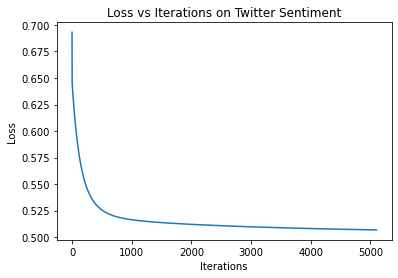

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
Xc, yc, test_size=0.2, random_state=42)
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
feature_number, lr, epochs = X_train.shape[1], .5, 1000000
LogRegSent = LogRegression(feature_number, lr, epochs)
losses = LogRegSent.fit(X_train_norm, y_train)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations on Twitter Sentiment")
plt.plot(losses)
plt.show
y_pred = LogRegSent.predict(X_test_norm)
cm = LogRegSent.metrics(y_pred, y_test)

#Test 1 Additional Feature

In [ ]:
def try_add_feature(x,y,feat,target):
  x_1=x
  x_1.insert(1, feat.name, feat)
  X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state=42)
  mms = MinMaxScaler()
  X_train_norm, X_test_norm = mms.fit_transform(X_train), mms.transform(X_test)
  feature_number, lr, epochs = X_train.shape[1], .5, 1000000
  LogRegSent = LogRegression(feature_number, lr, epochs)
  losses = LogRegSent.fit(X_train_norm, y_train)
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.title("Loss vs Iterations on Twitter Sentiment")
  plt.plot(losses)
  plt.show
  y_pred = LogRegSent.predict(X_test_norm)
  cm = LogRegSent.metrics(y_pred, y_test)
  f1=(2*cm[1][1]/(cm[1][1]+cm[0][1]))*(cm[1][1]/(cm[1][1]+cm[1][0]))/((cm[1][1]/(cm[1][1]+cm[1][0]))+(cm[1][1]/(cm[1][1]+cm[0][1])))
  print("The F1 with " + str(feat.name) + " is: " + str(f1) + " but the target was: " +str(target))
  diff=target-f1
  print("The difference in F1 score with " + str(feat.name) + " is: " + str(diff))
  return diff



In [ ]:
  features_selected = Xc_selected.columns
  all_features=Xc.columns
  removed_features_names=[]
  removed_features=[]
  for i in range(0,len(all_features)):
    good=0
    for j in range(0,len(features_selected)):
      if all_features[i] == features_selected[j]:
        good-=1
    if good==0:
      removed_features_names.append(Xc.columns[i])

  for k in range(0,len(removed_features_names)):
    removed_features.append(Xc[removed_features_names[k]])
    print("Adding " + str(removed_features_names[k]) + " to the removed features list")




Adding feature10 to the removed features list
Adding feature11 to the removed features list
Adding feature12 to the removed features list
Adding Feature 15 to the removed features list
Adding Feature 16 to the removed features list
Adding Feature 17 to the removed features list
Adding Feature 18 to the removed features list
Adding Feature 19 to the removed features list
Adding Feature 20 to the removed features list
Adding Feature 23 to the removed features list
Adding Feature 24 to the removed features list
Adding Feature 25 to the removed features list
Adding Feature 28 to the removed features list


The iteration is 0 and the loss is 0.6931471805599453
The iteration is 1000 and the loss is 0.5196841967540914
The iteration is 2000 and the loss is 0.5145978646120509
The iteration is 3000 and the loss is 0.5118385447677866
The iteration is 4000 and the loss is 0.509888629198091
The iteration is 5000 and the loss is 0.5084590254924924
The weight is 
[ 3.8223213  -0.75786424  0.82309067 -0.0750922   1.40115552 -0.87981623
  0.80076578 -0.230857    2.04982421  1.87357789  3.45359581 -4.33846946
 -0.07914294  0.46647226  1.27038873  1.16765758]
The intercept is 
-5.704076502193648
The confusion matrix is: 
[1159, 1026]
[515, 3558]
The accuracy for the Twitter sentiment is 0.7537551933525087
The precision for the Twitter sentiment is 0.7761780104712042
The recall for the Twitter sentiment is 0.8735575742695801
The F1 score for the Twitter sentiment is 0.8219937622733048
The F1 with feature10 is: 0.8219937622733048 but the target was: 0.8205009811843472
The difference in F1 score with feat

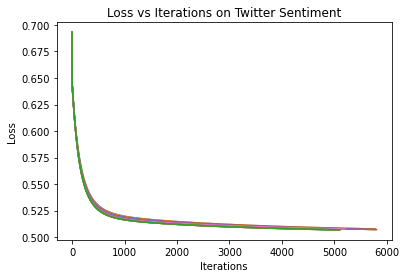

In [ ]:
f1_diff_add=[]
f1_selected = 0.8205009811843472 #this should be the F1 score of the Xc_selected features from SelectFromModel
for i in range(0,len(removed_features)):
  new=removed_features[i]
  Xc_OG=Xc_selected
  difference=try_add_feature(Xc_OG,yc,new,f1_selected)
  f1_diff_add.append(difference)
  print("---------------")
for i in range(0,len(removed_features)):
  print("To remove " + str(removed_features[i]) + " there was a loss of " + str(f1_diff_add[i]) + " in F1")

In [ ]:
for i in range(0,len(removed_features)):
  print("To remove " + str(removed_features[i].name) + " there was a loss of " + str(f1_diff_add[i]) + " in F1")

To remove feature10 there was a loss of -0.0014927810889575621 in F1
To remove feature11 there was a loss of -0.0025803806159989673 in F1
To remove feature12 there was a loss of -0.00229407141072846 in F1
To remove Feature 15 there was a loss of -0.0025661631586553213 in F1
To remove Feature 16 there was a loss of -0.0021448882552831394 in F1
To remove Feature 17 there was a loss of -0.001477040793674722 in F1
To remove Feature 18 there was a loss of -0.001477040793674722 in F1
To remove Feature 19 there was a loss of -0.0021989725835677154 in F1
To remove Feature 20 there was a loss of -0.0019267644803928619 in F1
To remove Feature 23 there was a loss of -0.0019267644803928619 in F1
To remove Feature 24 there was a loss of -0.0024843350371813733 in F1
To remove Feature 25 there was a loss of -0.00306920945690059 in F1
To remove Feature 28 there was a loss of -0.0029740650263736512 in F1


In [ ]:
f1_diffs_add_percent = []
maxnum=(min(f1_diff_add))
for i in range (0,len(f1_diff_add)):
  num=f1_diff_add[i]
  val = 100 * (num/maxnum)
  f1_diffs_add_percent.append(val)
  print("The feature " + str(removed_features[i].name) + " has a relative importance percentage " + str(f1_diffs_add_percent[i]))

The feature feature10 has a relative importance percentage 48.63731556675939
The feature feature11 has a relative importance percentage 84.0731351911296
The feature feature12 has a relative importance percentage 74.74470031918592
The feature Feature 15 has a relative importance percentage 83.60990654729493
The feature Feature 16 has a relative importance percentage 69.8840625054353
The feature Feature 17 has a relative importance percentage 48.12447030468545
The feature Feature 18 has a relative importance percentage 48.12447030468545
The feature Feature 19 has a relative importance percentage 71.64622077596246
The feature Feature 20 has a relative importance percentage 62.777223498411395
The feature Feature 23 has a relative importance percentage 62.777223498411395
The feature Feature 24 has a relative importance percentage 80.9438088884997
The feature Feature 25 has a relative importance percentage 100.0
The feature Feature 28 has a relative importance percentage 96.90003462249788


#Try 1 Remove Feature

In [ ]:
def try_remove_feature(x,y,feat,target):
  x_1=x
  x_1=x_1.drop(columns=feat)
  X_train, X_test, y_train, y_test = train_test_split(x_1, y, test_size=0.2, random_state=42)
  X_train_norm, X_test_norm = mms.fit_transform(X_train), mms.transform(X_test)
  feature_number, lr, epochs = X_train.shape[1], .5, 1000000
  LogRegSent = LogRegression(feature_number, lr, epochs)
  losses = LogRegSent.fit(X_train_norm, y_train)
  plt.xlabel("Iterations")
  plt.ylabel("Loss")
  plt.title("Loss vs Iterations on Twitter Sentiment")
  plt.plot(losses)
  plt.show
  y_pred = LogRegSent.predict(X_test_norm)
  cm = LogRegSent.metrics(y_pred, y_test)
  f1=(2*cm[1][1]/(cm[1][1]+cm[0][1]))*(cm[1][1]/(cm[1][1]+cm[1][0]))/((cm[1][1]/(cm[1][1]+cm[1][0]))+(cm[1][1]/(cm[1][1]+cm[0][1])))
  print("The F1 with " + str(feat) + " is: " + str(f1) + " but the target was: " +str(target))
  diff=target-f1
  print("The difference in F1 score without " + str(feat) + " is: " + str(diff))
  return diff



The iteration is 0 and the loss is 0.6931471805599453
The iteration is 1000 and the loss is 0.5195213987717158
The iteration is 2000 and the loss is 0.5166309665940962
The iteration is 3000 and the loss is 0.5153100848352188
The weight is 
[ 1.02005837  0.32852883  1.43025142 -0.29719017  0.97358146  0.03328336
  2.10723821  1.84029904 -0.52350885  0.23170659 -0.83332889  3.41715996
 -4.57456459  0.53160169 -0.12898674 -0.84950064  0.03416039 -0.84136759
  0.50317461 -0.05637017  0.3023505   0.         -0.13368123 -0.44904497
  1.16918284  1.31932973 -0.03435339]
The intercept is 
-2.444708083765628
The confusion matrix is: 
[1141, 1044]
[512, 3561]
The accuracy for the Twitter sentiment is 0.7513582614253755
The precision for the Twitter sentiment is 0.7732899022801303
The recall for the Twitter sentiment is 0.874294132089369
The F1 score for the Twitter sentiment is 0.8206960129061994
The F1 with feature1 is: 0.8206960129061994 but the target was: 0.8234750462107209
The difference in

AttributeError: ignored

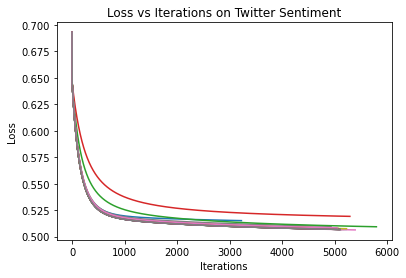

In [ ]:
all_features=Xc.columns
f1_diff_rem=[]
f1_selected = 0.8234750462107209 #this should be F1 score for logreg of all_features
for i in range(0,len(all_features)):
  new=all_features[i]
  difference=try_remove_feature(Xc,yc,new,f1_selected)
  f1_diff_rem.append(difference)
  print("---------------")
for i in range(0,len(all_features)):
  print("To remove " + str(all_features[i]) + " there was a loss of " + str(f1_diff_rem[i]) + " in F1")

In [ ]:
for i in range(0,len(all_features)):
  print("To remove " + str(all_features[i]) + " there was a loss of " + str(f1_diff_rem[i]) + " in F1")

To remove feature1 there was a loss of 0.00277903330452145 in F1
To remove feature2 there was a loss of 0.00017676815686673564 in F1
To remove feature3 there was a loss of -0.00032622473093135707 in F1
To remove feature4 there was a loss of 0.0013297174909977505 in F1
To remove feature5 there was a loss of -0.00017664567055875047 in F1
To remove feature6 there was a loss of -9.514443052693888e-05 in F1
To remove feature7 there was a loss of -0.0004352324342090652 in F1
To remove feature8 there was a loss of 0.0025073042752369323 in F1
To remove feature9 there was a loss of 0.00013556281588700259 in F1
To remove feature10 there was a loss of 0.00023105360443620437 in F1
To remove feature11 there was a loss of -0.00047594211432822053 in F1
To remove feature12 there was a loss of -0.000285499264836675 in F1
To remove Feature 13 there was a loss of 0.0008553116463815291 in F1
To remove Feature 14 there was a loss of 0.003488893429737683 in F1
To remove Feature 15 there was a loss of -6.796

In [ ]:
f1_diffs_rem_percent = []
maxnum=(max(f1_diff_rem))
for i in range (0,len(f1_diff_rem)):
  num=f1_diff_rem[i]
  val = 100 * (num/maxnum)
  f1_diffs_rem_percent.append(val)
  print("The " + str(all_features[i]) + " has a relative importance percentage " + str(f1_diffs_rem_percent[i]))

The feature1 has a relative importance percentage 79.65371715955209
The feature2 has a relative importance percentage 5.066596628032465
The feature3 has a relative importance percentage -9.350378207335634
The feature4 has a relative importance percentage 38.11287211193857
The feature5 has a relative importance percentage -5.063085878551235
The feature6 has a relative importance percentage -2.727066115461499
The feature7 has a relative importance percentage -12.474798757088685
The feature8 has a relative importance percentage 71.86531562889978
The feature9 has a relative importance percentage 3.8855533600289727
The feature10 has a relative importance percentage 6.622546921806564
The feature11 has a relative importance percentage -13.641635203629734
The feature12 has a relative importance percentage -8.183089297116783
The Feature 13 has a relative importance percentage 24.515270059304644
The Feature 14 has a relative importance percentage 100.0
The Feature 15 has a relative importance pe

#Visualizations

In [ ]:
"""
some visualization of how much the F1 difference is for each feature
order the features from best to worst with a label of each feature
that way we can try to describe why the best measured better
and why the worst measured worse
"""

In [ ]:
"""
try remove one
f1_diffs_rem_percent
The feature1 has a relative importance percentage 79.65371715955209
The feature2 has a relative importance percentage 5.066596628032465
The feature3 has a relative importance percentage -9.350378207335634
The feature4 has a relative importance percentage 38.11287211193857
The feature5 has a relative importance percentage -5.063085878551235
The feature6 has a relative importance percentage -2.727066115461499
The feature7 has a relative importance percentage -12.474798757088685
The feature8 has a relative importance percentage 71.86531562889978
The feature9 has a relative importance percentage 3.8855533600289727
The feature10 has a relative importance percentage 6.622546921806564
The feature11 has a relative importance percentage -13.641635203629734
The feature12 has a relative importance percentage -8.183089297116783
The Feature 13 has a relative importance percentage 24.515270059304644
The Feature 14 has a relative importance percentage 100.0
The Feature 15 has a relative importance percentage -1.9481682896726273
The Feature 16 has a relative importance percentage -14.410808963599086
The Feature 17 has a relative importance percentage -32.29809867334896
The Feature 18 has a relative importance percentage 0.0
The Feature 19 has a relative importance percentage 38.63624990419597
The Feature 20 has a relative importance percentage 4.282478378997581
The Feature 21 has a relative importance percentage 0.0
The Feature 22 has a relative importance percentage -3.117573533596616
The Feature 23 has a relative importance percentage 0.0
The Feature 24 has a relative importance percentage 1.1693149637741511
The Feature 25 has a relative importance percentage 16.763848254323037
The Feature 26 has a relative importance percentage 17.106209761126657
The Feature 27 has a relative importance percentage 43.999406431073545
The Feature 28 has a relative importance percentage -2.727066115461499
"""

In [ ]:
"""
try add one
f1_diffs_add_percent
The feature feature10 has a relative importance percentage 48.63731556675939
The feature feature11 has a relative importance percentage 84.0731351911296
The feature feature12 has a relative importance percentage 74.74470031918592
The feature Feature 15 has a relative importance percentage 83.60990654729493
The feature Feature 16 has a relative importance percentage 69.8840625054353
The feature Feature 17 has a relative importance percentage 48.12447030468545
The feature Feature 18 has a relative importance percentage 48.12447030468545
The feature Feature 19 has a relative importance percentage 71.64622077596246
The feature Feature 20 has a relative importance percentage 62.777223498411395
The feature Feature 23 has a relative importance percentage 62.777223498411395
The feature Feature 24 has a relative importance percentage 80.9438088884997
The feature Feature 25 has a relative importance percentage 100.0
The feature Feature 28 has a relative importance percentage 96.90003462249788
"""

In [ ]:
f1_diffs_add_percent_padded=['0','0','0','0','0','0','0','0','0','48.63731556675939','84.0731351911296','74.74470031918592','0','0','83.60990654729493','69.8840625054353','48.12447030468545','48.12447030468545','71.64622077596246','62.777223498411395', '0', '0', '62.777223498411395','80.9438088884997','100.0','0','0','96.90003462249788']

In [ ]:
"""
sklearn importance weights
The feature feature1 has a relative importance percentage 86.40163468408473
The feature feature2 has a relative importance percentage 58.47034172861291
The feature feature3 has a relative importance percentage 52.35136295591531
The feature feature4 has a relative importance percentage 54.667298886312345
The feature feature5 has a relative importance percentage 43.16589301930024
The feature feature6 has a relative importance percentage 51.793820864920214
The feature feature7 has a relative importance percentage 45.87124158175938
The feature feature8 has a relative importance percentage 69.95017570784626
The feature feature9 has a relative importance percentage 66.18688252818464
The feature feature10 has a relative importance percentage 27.100568860890473
The feature feature11 has a relative importance percentage 23.76248645309518
The feature feature12 has a relative importance percentage 26.34323571407327
The feature Feature 13 has a relative importance percentage 63.77158217368765
The feature Feature 14 has a relative importance percentage 100.0
The feature Feature 15 has a relative importance percentage 19.93415218412927
The feature Feature 16 has a relative importance percentage 18.48951650067179
The feature Feature 17 has a relative importance percentage 12.124680833676008
The feature Feature 18 has a relative importance percentage 0.29558592654752436
The feature Feature 19 has a relative importance percentage 33.31950900754798
The feature Feature 20 has a relative importance percentage 1.7483491926022832
The feature Feature 21 has a relative importance percentage 60.640364548123436
The feature Feature 22 has a relative importance percentage 43.51677324033304
The feature Feature 23 has a relative importance percentage 0.0
The feature Feature 24 has a relative importance percentage 37.105133477101845
The feature Feature 25 has a relative importance percentage 38.83102787782608
The feature Feature 26 has a relative importance percentage 56.08875958164439
The feature Feature 27 has a relative importance percentage 55.08022606346591
The feature Feature 28 has a relative importance percentage 1.0450935757526747
"""

In [ ]:
sklearn_imp=['86.40163468408473','58.47034172861291','52.35136295591531','54.667298886312345','43.16589301930024','51.793820864920214','45.87124158175938','69.95017570784626','66.18688252818464','27.100568860890473','23.76248645309518','26.34323571407327','63.77158217368765','100.0','19.93415218412927','18.48951650067179','12.124680833676008','0.29558592654752436','33.31950900754798','1.7483491926022832','60.640364548123436','43.51677324033304','0.0','37.105133477101845','38.83102787782608','56.08875958164439','55.08022606346591','1.0450935757526747']

In [ ]:
label=list(all_features)

fig = go.Figure(data=[
    go.Bar(name='Remove One from All List', x=label, y=f1_diffs_rem_percent),
    go.Bar(name='SKLearn', x=label, y=sklearn_imp),
    go.Bar(name='Add One to Best List', x=label, y=f1_diffs_add_percent_padded)
])
# Change the bar mode
fig.update_layout(barmode='group', xaxis={'categoryorder':'category ascending'})
fig.show()

#Verify our LogReg against sklearn

The confusion matrix for Twitter sentinment:
[[1166 1019]
 [ 509 3564]]


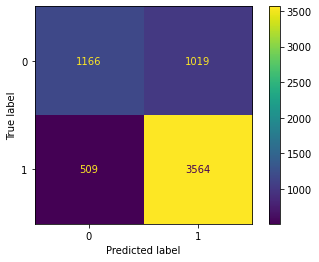

In [ ]:
#calling sklearn to compare. checks out my math above is correct!
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_twitter = confusion_matrix(y_test, y_pred)
print("The confusion matrix for Twitter sentinment:")
print(confusion_matrix_twitter)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_twitter)
disp.plot()
plt.show()

In [ ]:
from sklearn import metrics 
print("The confusion matrix for Twitter sentiment:")
print(confusion_matrix_twitter)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

The confusion matrix for Twitter sentiment:
[[1166 1019]
 [ 509 3564]]
Accuracy: 0.7558325343560243
Precision: 0.7776565568404975
Recall: 0.8750306899091579
F1 Score: 0.8234750462107209


In [ ]:
y_pred

array([1., 1., 1., ..., 0., 1., 1.])

In [ ]:
y_test

25651    1
5405     1
4034     1
21857    0
27040    0
        ..
6528     1
18615    1
1397     1
5312     1
30506    1
Name: Label, Length: 6258, dtype: int64

The confusion matrix for Twitter sentiment:
[[   7 2178]
 [   4 4069]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



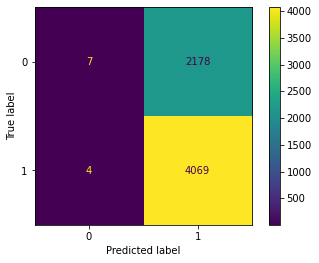

Accuracy: 0.6513263023330137
Precision: 0.6513526492716504
Recall: 0.9990179229069482
F1:


(None, 0.7885658914728682)

In [ ]:
#I implemented it from scratch above, just using this as a benchmark to test my code. 
#My code's metrics are really really close so I consider that a win
from sklearn import metrics  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#X=np.concatenate((X_train_norm, X_test_norm))
#y=np.concatenate((y_train, y_test))
#y.loc[y.Label == 2, 'Label'] = 1
X_train2, X_test2, y_train2, y_test2 = train_test_split(
Xc_selected, yc, test_size=0.33, random_state=55)
X_train2, X_test2, y_train2, y_test2 = X_train_norm, X_test_norm, y_train, y_test
goodmodel = LogisticRegression(max_iter=100000)
goodmodel.fit(X_train, y_train)
y_pred2 = pd.Series(goodmodel.predict(X_test2))
confusion_matrix_twitter2 = confusion_matrix(y_test2, y_pred2)
print("The confusion matrix for Twitter sentiment:")
print(confusion_matrix_twitter2)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_twitter2)
disp.plot()
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test2, y_pred2))
print("Precision:", metrics.precision_score(y_test2, y_pred2))
print("Recall:", metrics.recall_score(y_test2, y_pred2))
print("F1:"), metrics.f1_score(y_test2, y_pred2)

In [ ]:
y_test2

25651    1
5405     1
4034     1
21857    0
27040    0
        ..
6528     1
18615    1
1397     1
5312     1
30506    1
Name: Label, Length: 6258, dtype: int64

In [ ]:
y_pred2

0       1
1       1
2       1
3       1
4       1
       ..
6253    1
6254    1
6255    1
6256    1
6257    1
Length: 6258, dtype: int64

In [ ]:
print("Complete")

In [ ]:
# Allow about 16min for runtime
#Extract all features and put them in on data frame

def feature_extraction(data_location, label_location):
  df = pd.read_csv(data_location, header=None)
  df.columns = ['TWEET']

  df["Tweet Tokens"] = np.nan
  df["Count: Words in + Lexicon"] = np.nan
  df["Count: Words in - Lexicon"] = np.nan
  df["Contain The word NO? "] = np.nan
  df["Count: Nouns"] = np.nan
  df["Ratio: Unique Words-Total Words"] = np.nan
  df["Ratio: Stop Words-Total Words"] = np.nan
  df["Count: Adjectives in Tweet"] = np.nan
  df["Log: Tweet word count"] = np.nan
  df["Log: Length of Longest Word in Tweet"] = np.nan
  df["Log: Count of Words with 5+ Characters"] = np.nan

  # ADD LABELS COLUMN TO DF 
  labels = pd.read_csv(label_location, sep="\n", header=None)
  df = pd.concat([df,labels], axis = 1)
  df.rename(columns = {0:'Labels'}, inplace = True)

  # DROP NEUTRAL LABELS FROM DF
  df.drop(df.loc[df['Labels']==1].index, inplace=True)
  df = df.reset_index(drop=True)

  # CHANGE ALL 2 LABEL VALUES TO 1 
  for i in range(0, len(df.index)):
    if df['Labels'].values[i] == 2:
      df.at[i,'Labels'] = 1

  # CLEAN TWEETS
  pattern_a = r'[^A-Za-z0-9]+'
  pattern_b = r'\b\w{1,1}\b'
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)

  for i in range(0, len(df.index)):                       
    df['TWEET'].values[i] = df['TWEET'].values[i].lower()
    df['TWEET'].values[i] = df['TWEET'].values[i].replace('@user', '')
    df['TWEET'].values[i] = re.sub(pattern_a, ' ', df['TWEET'].values[i])
    df['TWEET'].values[i] = re.sub(pattern_b, '', df['TWEET'].values[i])
    df['TWEET'].values[i] = re.sub(emoji_pattern, '', df['TWEET'].values[i])

  #TOKENIZE TWEETS
  df['Tweet Tokens'] = df['Tweet Tokens'].astype('object')
  for i in range(0, len(df.index)):
    
    tokens = df['TWEET'].values[i].split()
    df.at[i, 'Tweet Tokens'] = tokens

  #Create Positive and Negative Lexicons
  pos_lexicon = []
  neg_lexicon = []

  for i in range(0, len(subreddit_dataframes)):               
    for j in range(0, len(subreddit_dataframes[i].index)):    

      if subreddit_dataframes[i]['Sentiment Score'].values[j] >= 0:         
        pos_lexicon.append(subreddit_dataframes[i]['Word'].values[j])        
      
      if subreddit_dataframes[i]['Sentiment Score'].values[j] < 0:         
        neg_lexicon.append(subreddit_dataframes[i]['Word'].values[j])        


  pos_lexicon = [*set(pos_lexicon)]   # Remove duplicate values from + lexicon
  neg_lexicon = [*set(neg_lexicon)]   # Remove duplicate values from - lexicon


  #Handle duplicate words in postitive and negative lexicon
  same_wrds = set(pos_lexicon).intersection(neg_lexicon)      #get set of all words that appear in both psoitive and Negative Lexicon
                                                              #https://stackoverflow.com/questions/1388818/how-can-i-compare-two-lists-in-python-and-return-matches

  word_vals_dict = dict.fromkeys(same_wrds, 0)                # Create a dictionary to hold of all words found in positive and negative lexicons     
  sentiment_vals2sum = []

  for k in range(0, len(same_wrds)):    # In the set of words identified in positive and negative lexicon
  
    i = same_wrds.pop()                 # i will return one word from the set, then the following with each iteration
    same_wrds.add(i)                    # https://stackoverflow.com/questions/59825/how-to-retrieve-an-element-from-a-set-without-removing-it

    sentiment_vals2sum = []             # Will store the Sentiment Scores collected across data frames 

    for j in range(0, len(subreddit_dataframes)):                    # in range of dataframes(44)
      is_wrd_there = i in subreddit_dataframes[j]['Word'].unique()   # Return true or false. True if desired word 'i' is in the data frame being checked false if not (ls_df_names[0], ls_df_names[1],...)
      if is_wrd_there is True:                              # If true... 

        mask1 = subreddit_dataframes[j]['Word'].values == i                  # Get the sentiment value of the word from its dataframe 
                                                                    # https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
                                                      
        sentiment_vals2sum.append(subreddit_dataframes[j][mask1].iat[0,1])   # append sentiment value to list where they are stored eg. sentiment_vals2sum 
        num_avg = mean(sentiment_vals2sum)                          # Take the mean of the sentiment scores collected in the list above(these are all sentiment scores for one word collected across dataframes where the word was found 'True')
        word_vals_dict[i] = num_avg  

  # Remove words that now have a clear positive or negative classification
  for w in word_vals_dict.items():        # .items() returns a tuple of (word, score). See Cell above for all words: scores in dict
    if w[1] >= 0:                         # if w[1] (the score) is greater than 0...
      neg_lexicon.remove(w[0])            # remove it from the negative lexicon
    if w[1] < 0:                          # If w[1] (the score) is less than 0...
      pos_lexicon.remove(w[0])            # remove the word from the positive lexicon

  # COUNT POSITIVE AND NEGATIVE WORDS
  neg_lex_set = set(neg_lexicon)
  pos_lex_set = set(pos_lexicon)

  for i in range(0, len(df.index)):
    x = set(df['Tweet Tokens'][i])
    df['Count: Words in + Lexicon'].values[i] = len(x.intersection(pos_lex_set))
    df['Count: Words in - Lexicon'].values[i] = len(x.intersection(neg_lex_set))

  # DOES TWEET CONTAIN NO
  for i in range(0, len(df.index)):                       # In the range 0 to length of the tweets dataframe         # Tokenize and lowercase tweets 
    if 'no' in df['Tweet Tokens'][i]:                                    # If no is in tweet dataframe value is 1 if not value is zero
      df['Contain The word NO? '].values[i] = 1
    else: 
      df['Contain The word NO? '].values[i] = 0

  # COUNT NOUNS IN TWEET
  for i in range(0, len(df.index)):
    tokens = df['Tweet Tokens'][i]
    tokens = [w for w in tokens if not w in stop_words]
    tagged = nltk.pos_tag(tokens)

    noun_definitions = ['NN', 'NNS', 'NNP', 'NNPS']
    count = 0

    for j in range(0, len(tagged)):
      if tagged[j][1] in noun_definitions:
        count += 1
    
    df['Count: Nouns'].values[i] = count    

  # RATIO: UNIQUE TO TOTAL WORDS
  for i in range(0, len(df.index)):                       
    tokens = df['Tweet Tokens'][i]
    x = np.array(tokens)
    ratio = len(np.unique(x)) / len(tokens)
    df['Ratio: Unique Words-Total Words'].values[i] = ratio    

  # STOP WORDS TO TOTAL WORDS
  for i in range(0, len(df.index)):                       
    tokens = df['Tweet Tokens'][i]
    x = np.array(tokens)
    stop_wrds_count = [w for w in tokens if w in stop_words]
    ratio = len(stop_wrds_count) / len(tokens)
    df['Ratio: Stop Words-Total Words'].values[i] = ratio

  #ADJECTIVES IN TWEET
  for i in range(0, len(df.index)):
    tokens = df['Tweet Tokens'][i]
    tokens = [w for w in tokens if not w in stop_words]
    tagged = nltk.pos_tag(tokens)

    adj_definitions = ['JJ', 'JJR', 'JJS ']
    count = 0

    for j in range(0, len(tagged)):
      if tagged[j][1] in adj_definitions:
        count += 1
    
    df['Count: Adjectives in Tweet'].values[i] = count

  # LOG OF TWEET WORD COUNT 
  for i in range(0, len(df.index)):           #In range: length of dataframe of tweets
    tokens = df['Tweet Tokens'][i]       #tokenize tweets 
    log_val = math.log(len(tokens))
    df['Log: Tweet word count'].values[i] = log_val


  # LOG LENGTH OF LONGEST WORD IN TWEET
  for i in range(0, len(df.index)):           #In range: length of dataframe of tweets
    tokens = df['Tweet Tokens'][i]   #tokenize tweets 
    longest_wrd = max(tokens, key=len)
    log_val =  math.log(len(longest_wrd))
    df['Log: Length of Longest Word in Tweet'].values[i] = log_val

  #LOG OF COUNT OF WORD WITH 5+ CHARACTERS
  for i in range(0, len(df.index)):           #In range: length of dataframe of tweets
    tokens = df['Tweet Tokens'][i]    #tokenize tweets
    count = 0
      
    if any(len(i) >= 5 for i in tokens) is True:

      for j in range(0, len(tokens)):
        if len(tokens[j]) >= 5:
          count = count +1

      log_val = math.log(count)
      df['Log: Count of Words with 5+ Characters'].values[i] = log_val
      
    else:
      df['Log: Count of Words with 5+ Characters'].values[i] = 0


  return(df)

In [ ]:
#How to run: 
# dataframe = feature_extraction(data_location, label_location)